# Decision Tree Classifier Model For Wine Data

### Import data

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
wine_data = pd.read_csv("preprocessed_wine.csv")
wine_data

,Class,Alcohol,Flavanoids,Color intensity,OD280/OD315 of diluted wines,Proline
0,1,14.23,3.06,5.64,3.92,1065
1,1,13.20,2.76,4.38,3.40,1050
2,1,13.16,3.24,5.68,3.17,1185
3,1,14.37,3.49,7.80,3.45,1480
4,1,13.24,2.69,4.32,2.93,735
...,...,...,...,...,...,...
173,3,13.71,0.61,7.70,1.74,740
174,3,13.40,0.75,7.30,1.56,750
175,3,13.27,0.69,10.20,1.56,835
176,3,13.17,0.68,9.30,1.62,840


Start by including all features in the model.

In [96]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

X = wine_data.loc[:,["Alcohol", "Flavanoids", "Color intensity", "OD280/OD315 of diluted wines", "Proline"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 14}

1.0

0.8611111111111112

This model is overfitted as shown by the 100% training accuracy and 86% testing accuracy. To prevent this, I'll see how a model with a lower max depth performs.

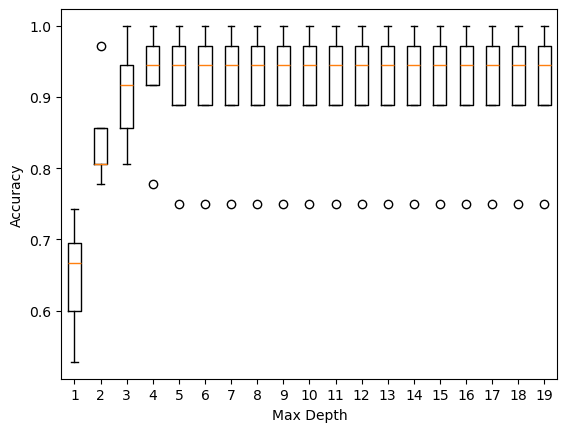

In [98]:
max_depth_values = range(1, 20)

# Use this to store our results
scores = np.ones((len(max_depth_values), 5))

for (i, max_depth_candidate) in enumerate(max_depth_values):
  # Initializing our model with the given C value 
  model = DecisionTreeClassifier(max_depth=max_depth_candidate, random_state=20250428)
  current_scores = cross_val_score(model, X, y, cv=5)
  scores[i] = current_scores

plt.boxplot(scores.T)
plt.ylabel("Accuracy")
plt.xlabel("Max Depth")
plt.show()


The boxplot shows that a max depth of 4 may be more favorable, so lets try that.

In [99]:
X = wine_data.loc[:,["Alcohol", "Flavanoids", "Color intensity", "OD280/OD315 of diluted wines", "Proline"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Initialize model
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Test accuracy
accuracy = model.score(X_test, y_test)

# Print final accuracy
print("Testing accuracy: %0.2f%%" % (accuracy*100))

Testing accuracy: 86.11%


Still, the best testing accuracy is 86%, so I will try lowering the number of included features.
The following plots seemed to differentiate the classes best, so I will test them:
- Proline vs OD280/OD315 of diluted wines
- Proline vs Flavanoids
- Flavanoids vs Color Intensity

### Proline vs OD280/OD315 of diluted wines

In [83]:
X = wine_data.loc[:,["Proline", "OD280/OD315 of diluted wines"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 2}

0.9295774647887324

0.8611111111111112

This model is less overfit and less complex, but did not perform better than the previous model.

### Proline vs Flavanoids

In [84]:
X = wine_data.loc[:,["Proline", "Flavanoids"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 3}

0.9295774647887324

0.9166666666666666

This model is a strong contender thus far since it is simple, not overfit, and has the highest testing accuracy.

### Flavanoids vs Color Intensity

In [85]:
X = wine_data.loc[:,["Color intensity", "Flavanoids"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 3}

0.9647887323943662

0.9166666666666666

This model produced the same high accuracy as the previous model, but is more complex and shows more signs of possible overfitting.
Next, I will try a model with 3 features instead of just 2. Because Proline vs Flavanoids produced the best model, I will try these two with a third feature included.

In [95]:
X = wine_data.loc[:,["Proline", "Flavanoids", "Color intensity"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 4}

1.0

0.9722222222222222

This is our best model thus far as it has produced the highest training accuracy, doesn't appear to be very overfit, and is relatively simple. Let's plot cross validation scores to verify that a max depth of 4 is the best choice for this model.

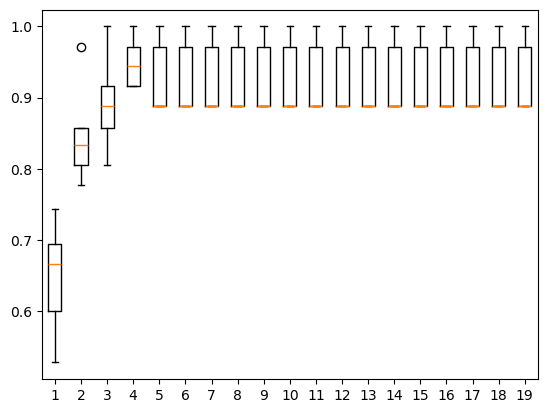

In [87]:
max_depth_values = range(1, 20)

# Use this to store our results
scores = np.ones((len(max_depth_values), 5))

for (i, max_depth_candidate) in enumerate(max_depth_values):
  # Initializing our model with the given C value 
  model = DecisionTreeClassifier(max_depth=max_depth_candidate, random_state=20250428)
  current_scores = cross_val_score(model, X, y, cv=5)
  scores[i] = current_scores

plt.boxplot(scores.T)
plt.show()

The boxplots confirm that 4 is the best max depth for this model as it has the highest average accuracy with the simplest complexity.

In [88]:
X = wine_data.loc[:,["Proline", "Flavanoids", "OD280/OD315 of diluted wines"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 3}

0.9647887323943662

0.8333333333333334

This model shows more signs of overfitting and has a lower testing accuracy than the previous model.

In [89]:
X = wine_data.loc[:,["Proline", "Flavanoids", "Alcohol"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Grid CV 
param = {
    "max_depth": range(1, 20)
}

# Initialize model 
tree_classifier = DecisionTreeClassifier()

gs_tree = GridSearchCV(tree_classifier, 
                        param_grid = param,
                        scoring="accuracy",
                        cv=5,
                       )

gs_tree.fit(X_train, y_train)

display(gs_tree.best_params_)

display(gs_tree.score(X_train, y_train))
display(gs_tree.score(X_test, y_test))

{'max_depth': 8}

1.0

0.9166666666666666

This model again shows more signs of possible overfitting and didn't perform as well as a previous model.

### Based on these observations, the best model appears to be the one including the `Proline`, `Flavanoids`, and `Color intenisty` attributes, with a max depth of 4. So, let's train this model using the full training set.

In [102]:
# Chosen attributes
X = wine_data.loc[:,["Proline", "Flavanoids", "Color intensity"]]
y = wine_data.loc[:,"Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20250428)

# Initialize model
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train, y_train)

# Test accuracy
accuracy = model.score(X_test, y_test)

# Print final accuracy
print("Our final testing accuracy is: %0.2f%%" % (accuracy*100))

Our final testing accuracy is: 97.22%


This is a very high training accuracy that allows us to accept our hypothesis that the class of wine can be determined by it's chemical makeup and physical attributes.

### Visualize the model

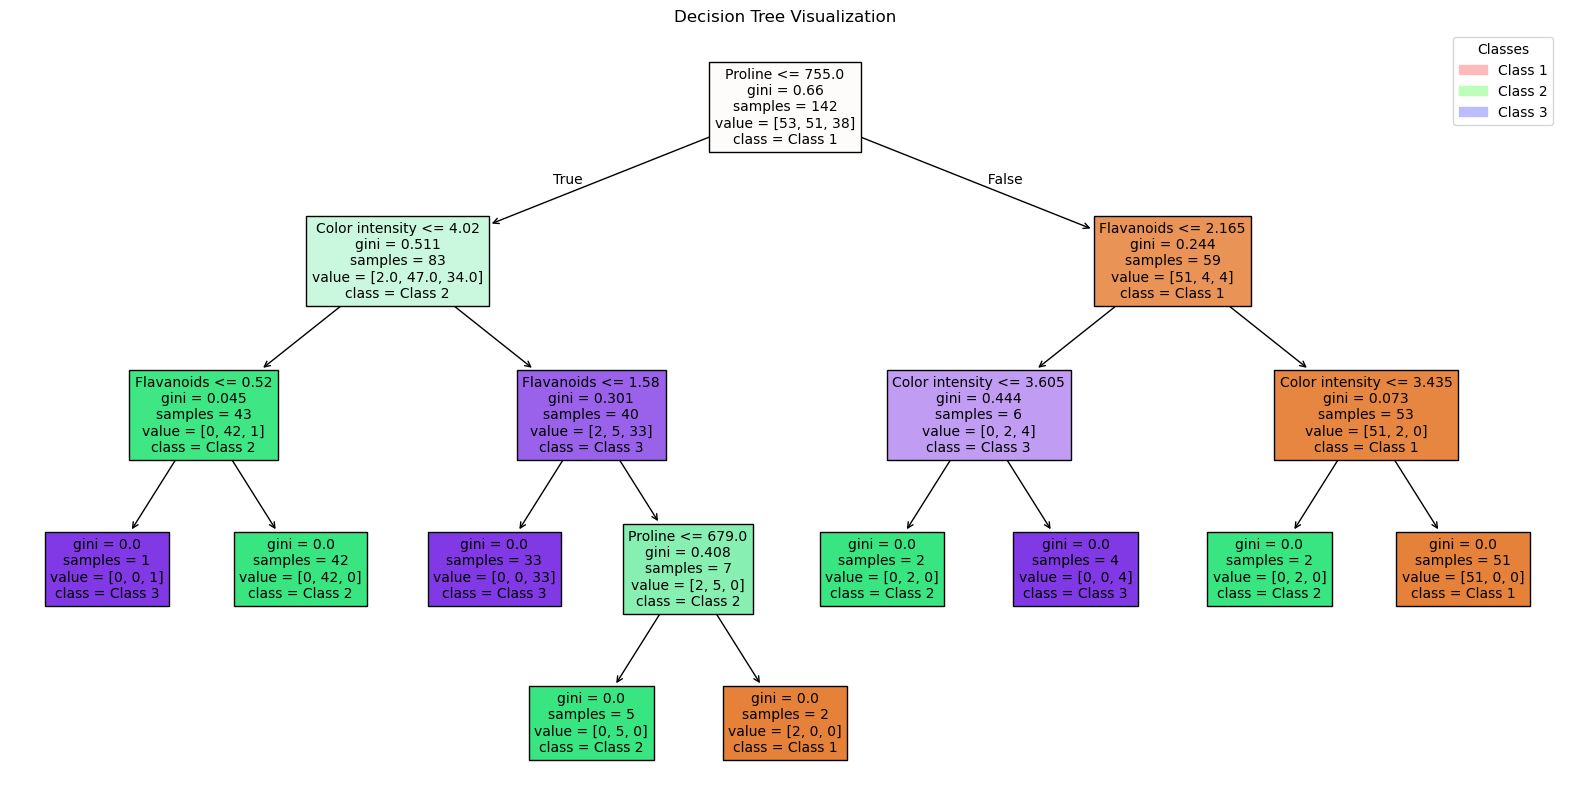

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.patches as mpatches

# Set up the figure
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Class 1", "Class 2", "Class 3"],
    filled=True,
    fontsize=10
)

legend_labels = [
    mpatches.Patch(color='#FFBBBB', label='Class 1'),
    mpatches.Patch(color='#BBFFBB', label='Class 2'),
    mpatches.Patch(color='#BBBBFF', label='Class 3')
]

plt.legend(handles=legend_labels, title='Classes')

plt.title("Decision Tree Visualization")
plt.show()

### Show efficacy of model using a confusion matrix

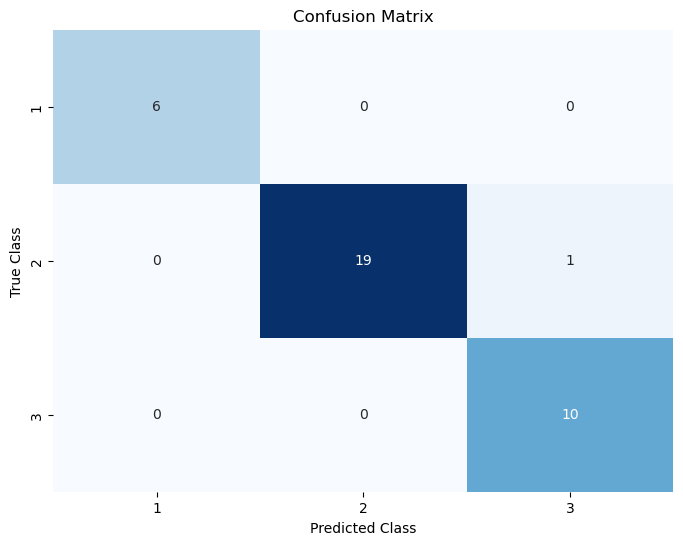

In [103]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

As shown above in the confusion matrix, the model correctly classified all but one data point in the testing set.